In [204]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import datajoint as dj
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USER']
dj.config['database.password'] = os.environ['DJ_PASS']
dj.config['enable_python_native_blobs'] = True
dj.config['schema_name'] = "anix_nnfabrik_bias_transfer1"
# dj.config['schema_name'] = "anix_nnfabrik_bias_transfer_test2"

import matplotlib.pyplot as plt
import numpy as np
from bias_transfer.dataset import dataset_loader
from bias_transfer.trainer import trainer
from bias_transfer.models import resnet_builder
from bias_transfer.analysis.analyzer import Analyzer
from bias_transfer.main import *


from bias_transfer.tables.trained_model import *
from bias_transfer.tables.trained_transfer_model import *
import nnfabrik as nnf
import seaborn as sns
# nnf.config['repos'] = ['/notebooks/nnfabrik']
# from nnfabrik.main import *
schema

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Schema `anix_nnfabrik_bias_transfer1`

In [205]:
analysis = Analyzer()

In [206]:
from bias_transfer.experiments.baseline import experiments

In [207]:
analysis.add_data(experiments, TrainedModel(), transfer_level=0)
analysis.df

,name,comment,training_progress,test_acc,test_loss,dev_acc,epoch,dev_noise_acc,dev_noise_loss
0,Clean,..,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,70.20,171,"{'noise_snr': {'5.0_1.0': 21.52, '4.0_1.0': 15...","{'noise_snr': {'5.0_1.0': 7.00616170167923, '4..."
1,Noise Augmented,Noise Augmented..,"[{'train_acc': 8.517777777777777, 'train_loss'...",66.64,1.314018,60.36,0,"{'noise_snr': {'5.0_1.0': 63.06, '4.0_1.0': 61...","{'noise_snr': {'5.0_1.0': 1.4917260140180588, ..."
2,Clean,..,"[{'train_acc': 9.64, 'train_loss': 3.941039047...",70.07,1.397016,70.32,161,"{'noise_snr': {'5.0_1.0': 24.08, '4.0_1.0': 17...","{'noise_snr': {'5.0_1.0': 5.594963121414184, '..."
3,Noise Augmented,Noise Augmented..,"[{'train_acc': 9.02, 'train_loss': 4.020031837...",66.39,1.341035,61.08,0,"{'noise_snr': {'5.0_1.0': 63.72, '4.0_1.0': 62...","{'noise_snr': {'5.0_1.0': 1.5217419117689133, ..."
4,Clean,..,"[{'train_acc': 96.81333333333333, 'train_loss'...",70.34,1.455977,71.64,183,"{'noise_snr': {'5.0_1.0': 26.38, '4.0_1.0': 20...","{'noise_snr': {'5.0_1.0': 5.422771668434143, '..."
5,Noise Augmented,Noise Augmented..,"[{'train_acc': 8.722222222222221, 'train_loss'...",66.64,1.497610,60.90,0,"{'noise_snr': {'5.0_1.0': 64.4, '4.0_1.0': 63....","{'noise_snr': {'5.0_1.0': 1.6363701701164246, ..."


In [208]:
from bias_transfer.experiments.baseline import transfer_experiments

In [209]:
analysis.add_data(transfer_experiments, TrainedTransferModel(), transfer_level=1)
analysis.df

,name,comment,training_progress,test_acc,test_loss,dev_acc,epoch,dev_noise_acc,dev_noise_loss
0,Clean,..,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,70.20,171,"{'noise_snr': {'5.0_1.0': 21.52, '4.0_1.0': 15...","{'noise_snr': {'5.0_1.0': 7.00616170167923, '4..."
1,Noise Augmented,Noise Augmented..,"[{'train_acc': 8.517777777777777, 'train_loss'...",66.64,1.314018,60.36,0,"{'noise_snr': {'5.0_1.0': 63.06, '4.0_1.0': 61...","{'noise_snr': {'5.0_1.0': 1.4917260140180588, ..."
2,Clean,..,"[{'train_acc': 9.64, 'train_loss': 3.941039047...",70.07,1.397016,70.32,161,"{'noise_snr': {'5.0_1.0': 24.08, '4.0_1.0': 17...","{'noise_snr': {'5.0_1.0': 5.594963121414184, '..."
3,Noise Augmented,Noise Augmented..,"[{'train_acc': 9.02, 'train_loss': 4.020031837...",66.39,1.341035,61.08,0,"{'noise_snr': {'5.0_1.0': 63.72, '4.0_1.0': 62...","{'noise_snr': {'5.0_1.0': 1.5217419117689133, ..."
4,Clean,..,"[{'train_acc': 96.81333333333333, 'train_loss'...",70.34,1.455977,71.64,183,"{'noise_snr': {'5.0_1.0': 26.38, '4.0_1.0': 20...","{'noise_snr': {'5.0_1.0': 5.422771668434143, '..."
5,Noise Augmented,Noise Augmented..,"[{'train_acc': 8.722222222222221, 'train_loss'...",66.64,1.497610,60.90,0,"{'noise_snr': {'5.0_1.0': 64.4, '4.0_1.0': 63....","{'noise_snr': {'5.0_1.0': 1.6363701701164246, ..."
0,Noise Augmented -> Transfer (Reset),Transfer + Reset..,"[{'train_acc': 72.21555555555555, 'train_loss'...",67.28,1.346503,67.20,150,"{'noise_snr': {'5.0_1.0': 55.56, '4.0_1.0': 52...","{'noise_snr': {'5.0_1.0': 1.9014578267931939, ..."
1,Noise Augmented -> Transfer (Reset),Transfer + Reset..,"[{'train_acc': 73.02888888888889, 'train_loss'...",66.75,1.369896,67.96,92,"{'noise_snr': {'5.0_1.0': 54.78, '4.0_1.0': 51...","{'noise_snr': {'5.0_1.0': 2.0096032857894897, ..."
2,Noise Augmented -> Transfer (Reset),Transfer + Reset..,"[{'train_acc': 82.31333333333333, 'train_loss'...",66.11,1.538564,66.54,135,"{'noise_snr': {'5.0_1.0': 54.64, '4.0_1.0': 50...","{'noise_snr': {'5.0_1.0': 2.063586765527725, '..."


In [210]:
from bias_transfer.experiments.noise_adv_training import transfer_experiments

In [212]:
analysis.add_data(transfer_experiments, TrainedTransferModel(), transfer_level=1)
analysis.df

,name,comment,training_progress,test_acc,test_loss,dev_acc,epoch,dev_noise_acc,dev_noise_loss
0,Clean,..,"[{'train_acc': 10.144444444444444, 'train_loss...",69.78,1.403972,70.20,171,"{'noise_snr': {'5.0_1.0': 21.52, '4.0_1.0': 15...","{'noise_snr': {'5.0_1.0': 7.00616170167923, '4..."
1,Noise Augmented,Noise Augmented..,"[{'train_acc': 8.517777777777777, 'train_loss'...",66.64,1.314018,60.36,0,"{'noise_snr': {'5.0_1.0': 63.06, '4.0_1.0': 61...","{'noise_snr': {'5.0_1.0': 1.4917260140180588, ..."
2,Clean,..,"[{'train_acc': 9.64, 'train_loss': 3.941039047...",70.07,1.397016,70.32,161,"{'noise_snr': {'5.0_1.0': 24.08, '4.0_1.0': 17...","{'noise_snr': {'5.0_1.0': 5.594963121414184, '..."
3,Noise Augmented,Noise Augmented..,"[{'train_acc': 9.02, 'train_loss': 4.020031837...",66.39,1.341035,61.08,0,"{'noise_snr': {'5.0_1.0': 63.72, '4.0_1.0': 62...","{'noise_snr': {'5.0_1.0': 1.5217419117689133, ..."
4,Clean,..,"[{'train_acc': 96.81333333333333, 'train_loss'...",70.34,1.455977,71.64,183,"{'noise_snr': {'5.0_1.0': 26.38, '4.0_1.0': 20...","{'noise_snr': {'5.0_1.0': 5.422771668434143, '..."
5,Noise Augmented,Noise Augmented..,"[{'train_acc': 8.722222222222221, 'train_loss'...",66.64,1.497610,60.90,0,"{'noise_snr': {'5.0_1.0': 64.4, '4.0_1.0': 63....","{'noise_snr': {'5.0_1.0': 1.6363701701164246, ..."
0,Noise Augmented -> Transfer (Reset),Transfer + Reset..,"[{'train_acc': 72.21555555555555, 'train_loss'...",67.28,1.346503,67.20,150,"{'noise_snr': {'5.0_1.0': 55.56, '4.0_1.0': 52...","{'noise_snr': {'5.0_1.0': 1.9014578267931939, ..."
1,Noise Augmented -> Transfer (Reset),Transfer + Reset..,"[{'train_acc': 73.02888888888889, 'train_loss'...",66.75,1.369896,67.96,92,"{'noise_snr': {'5.0_1.0': 54.78, '4.0_1.0': 51...","{'noise_snr': {'5.0_1.0': 2.0096032857894897, ..."
2,Noise Augmented -> Transfer (Reset),Transfer + Reset..,"[{'train_acc': 82.31333333333333, 'train_loss'...",66.11,1.538564,66.54,135,"{'noise_snr': {'5.0_1.0': 54.64, '4.0_1.0': 50...","{'noise_snr': {'5.0_1.0': 2.063586765527725, '..."


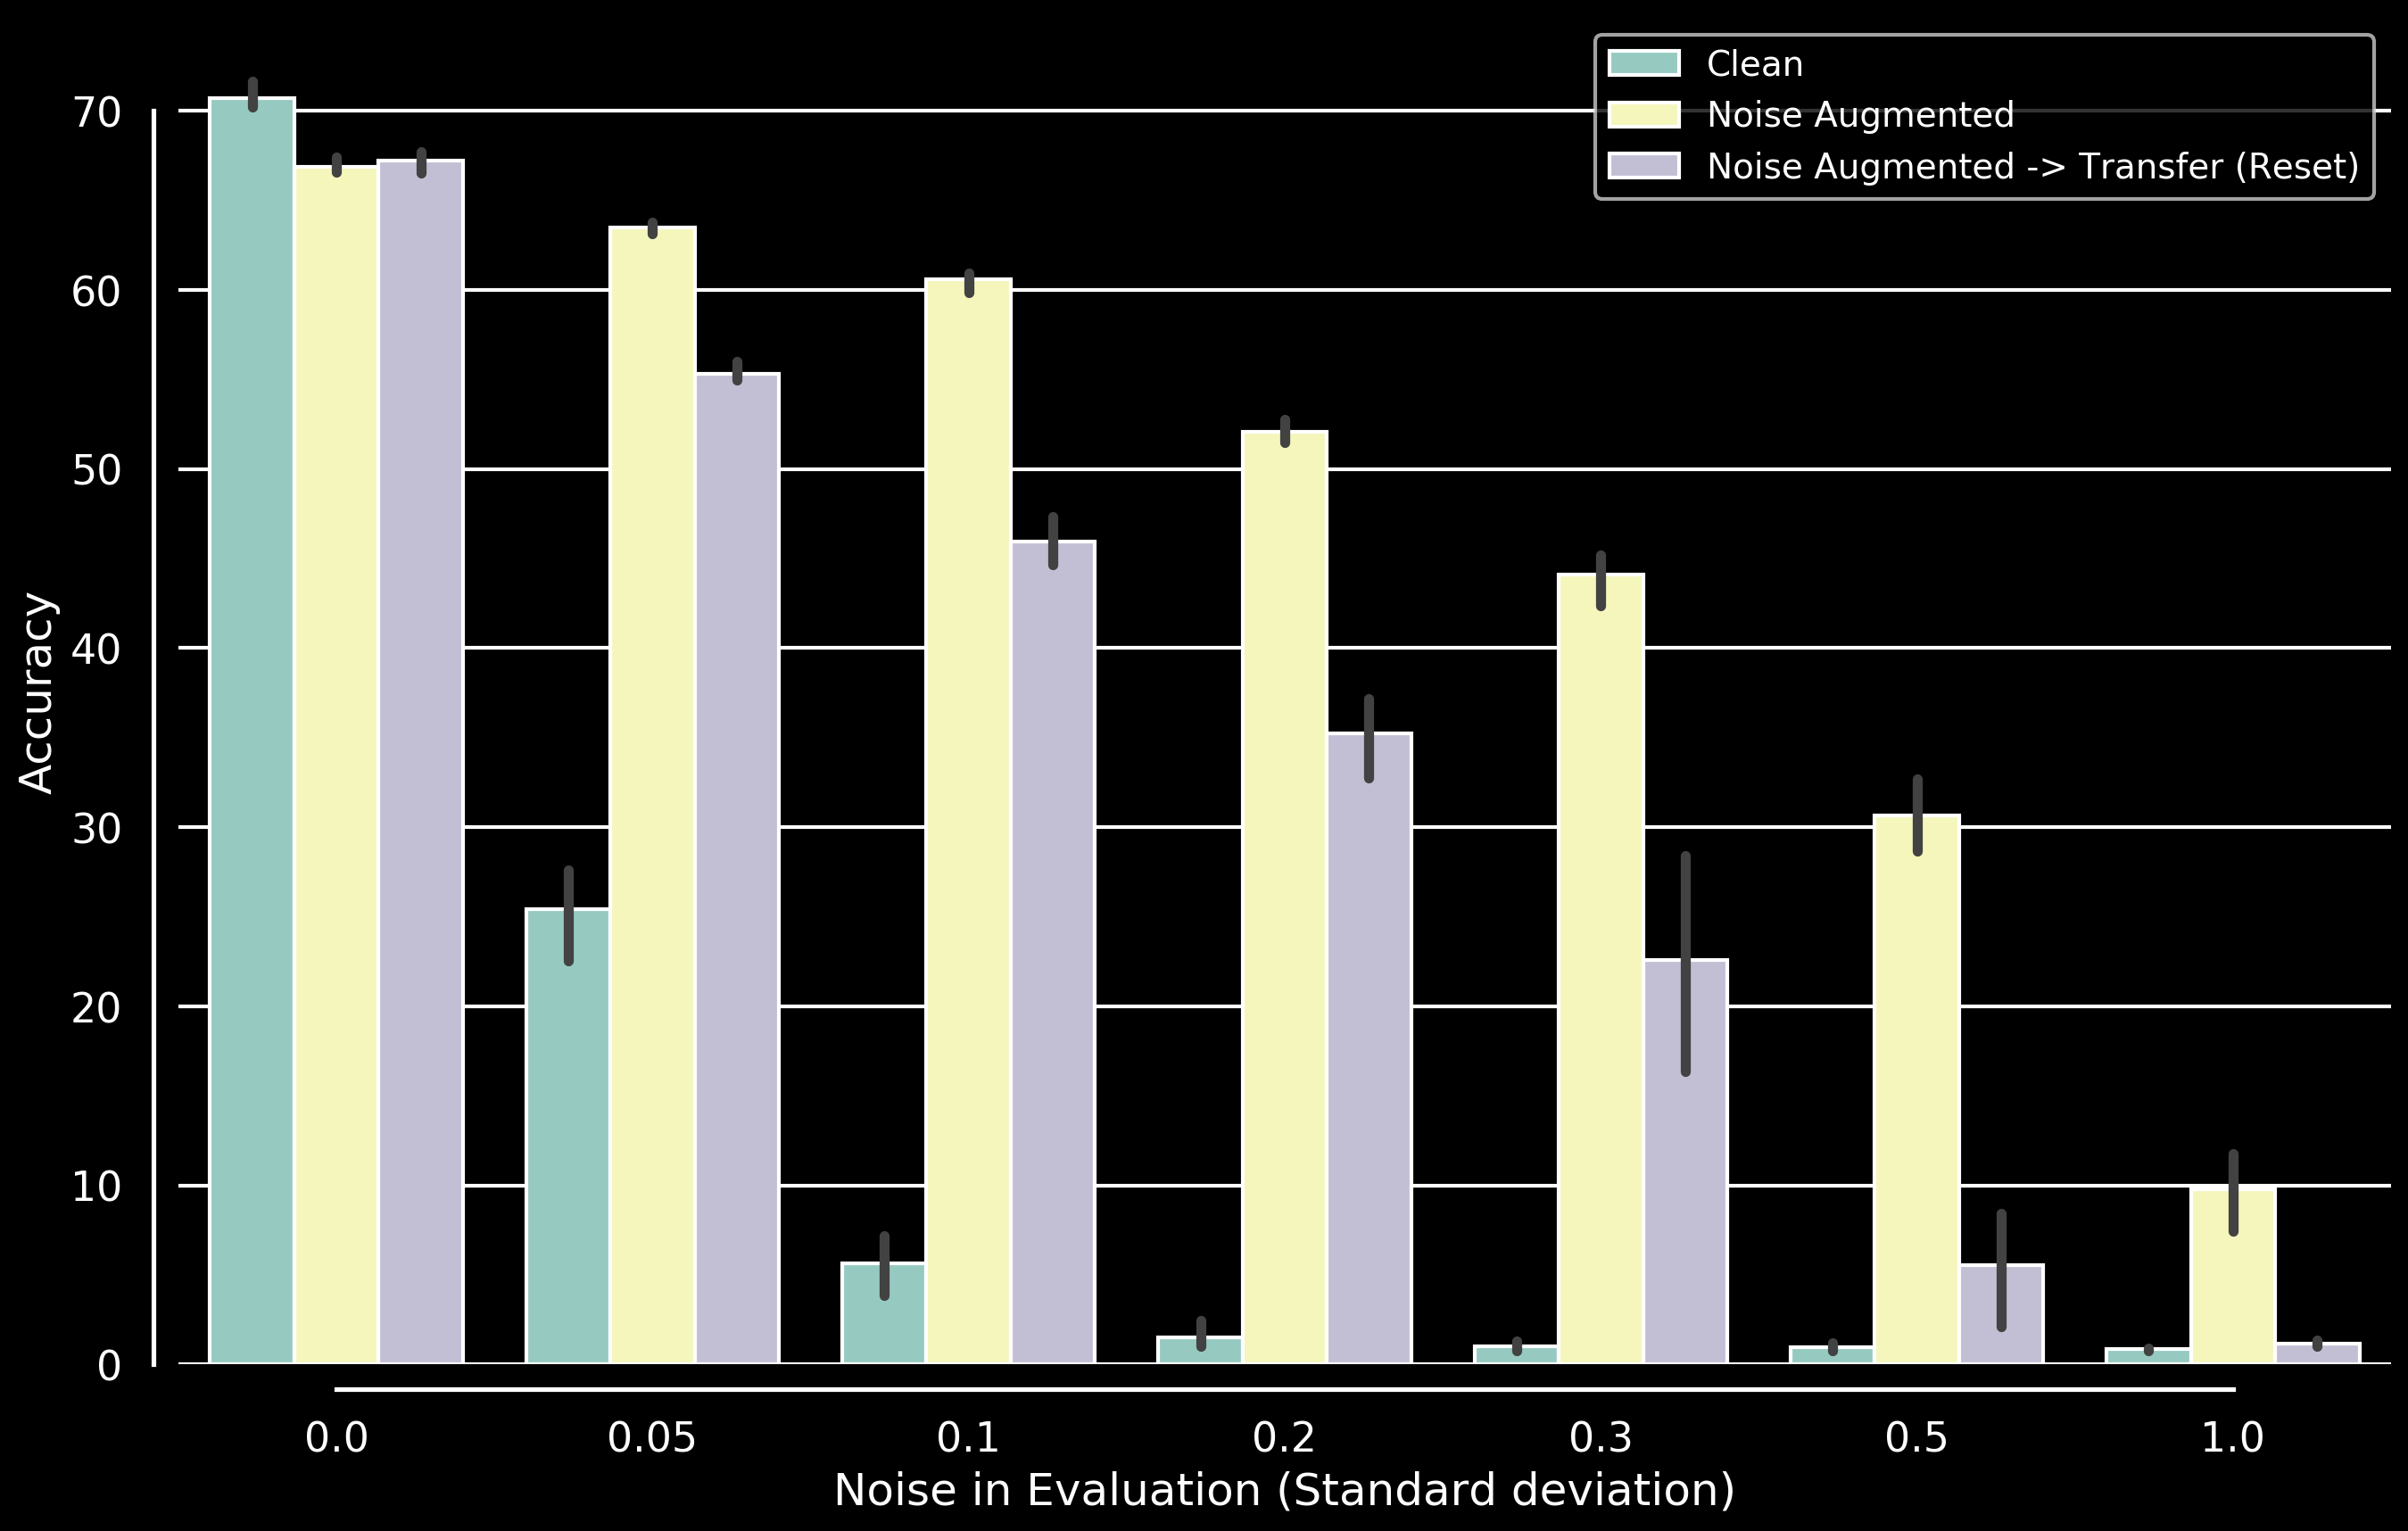

In [213]:
x = analysis.plot(to_plot="dev_noise_acc", 
       noise_measure="std",
       kind=None, 
       plot_method=sns.barplot,
        save="rep_matching",
                  style="darktalk"
       )

# Visualization

In [3]:
config = Config(apply_data_augmentation=False, apply_data_normalization=False, batch_size=128)

In [4]:
data_loaders, model, train_fct = nnf.builder.get_all_parts(dataset_fn=config.dataset_fn,
                                                               dataset_config=config.dataset,
                                                               trainer_fn=config.trainer_fn,
                                                               trainer_config=config.trainer,
                                                               model_fn=config.model_fn,
                                                               model_config=config.model,
                                                           seed=8
                                                               )

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


==> Starting visualization 


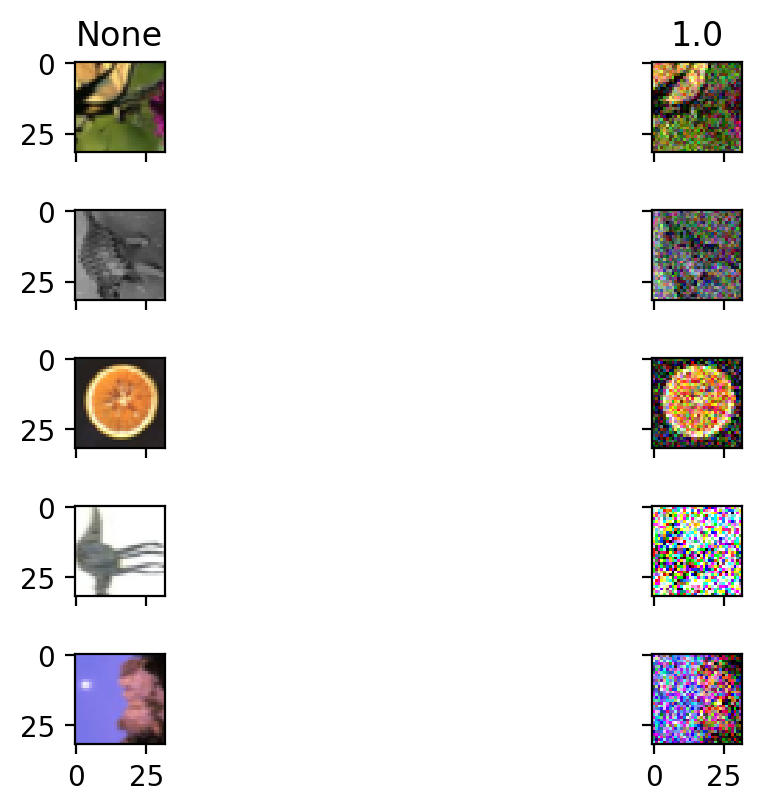

In [5]:
visualize_data(data_loader=data_loaders['val'], num_samples=5, add_noise=True 
               ,noise_snrs=({None:1.0}, {1.0:1.0}), noise_stds=())